<a href="https://colab.research.google.com/github/pyayivargitam/Infosys-Assignments/blob/main/decision_tree_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Model Training
- A `Decision Tree` is a supervised machine learning algorithm used for both classification and regression tasks. It has a hierarchical, tree-like structure consisting of a root node, internal (decision) nodes, branches, and leaf nodes. The root node represents the entire dataset, internal nodes represent feature-based decisions/tests, branches represent possible outcomes of these tests, and leaf nodes represent the final prediction or decision.

- The algorithm works by recursively splitting the dataset based on feature values to form subsets that are as pure as possible (i.e., containing similar class labels). This step-by-step decision-making process mimics a flowchart or decision path, making decision trees easy to interpret and visualize.

In [ ]:
# code for mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/preprocessed_earthquake_data.csv')
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status,Year,Day,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ATLAS,Source_CI,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW,Status_Reviewed
0,0.583377,0.844368,Earthquake,0.495984,0.277668,MW,-0.103839,ISCGEM,Automatic,-1.915523,-1.577830,0.704119,1.226184,-0.373680,-1.362923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006109,0.698849,Earthquake,0.075272,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,-1.347166,0.704119,1.226184,0.356511,-1.362923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739162,-1.701962,Earthquake,-0.413928,0.750418,MW,-0.103839,ISCGEM,Automatic,-1.915523,-1.231834,0.704119,1.226184,-1.419204,0.006682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.017599,-0.503524,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,-0.885838,0.704119,1.226184,-1.419204,0.006682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.340688,0.691479,Earthquake,-0.454694,-0.195082,MW,-0.103839,ISCGEM,Automatic,-1.915523,-0.770506,0.704119,1.226184,-0.373680,-1.362923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(23409, 40)

In [ ]:
# 4. Data Cleaning (if needed)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
# Impute or drop as appropriate (example: drop rows with missing target)
df = df.dropna(subset=['Status_Reviewed'])

Missing Values:
 Latitude                  0
Longitude                 0
Type                      0
Depth                     0
Magnitude                 0
Magnitude Type            0
Root Mean Square          0
Source                    0
Status                    0
Year                      0
Day                       0
Month_sin                 0
Month_cos                 0
Hour_sin                  0
Hour_cos                  0
Type_Explosion            0
Type_Nuclear Explosion    0
Type_Rock Burst           0
Magnitude Type_MD         0
Magnitude Type_MH         0
Magnitude Type_ML         0
Magnitude Type_MS         0
Magnitude Type_MW         0
Magnitude Type_MWB        0
Magnitude Type_MWC        0
Magnitude Type_MWR        0
Magnitude Type_MWW        0
Source_ATLAS              0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Sou

In [ ]:
## Feature Selection
drop_columns = ['Type','Magnitude Type','Status', 'Source', 'Year', 'Day']
X = df.drop(columns=drop_columns+['Status_Reviewed'])
y = df['Status_Reviewed']

In [ ]:
## Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_test

,Status_Reviewed
13119,1.0
17919,1.0
3418,1.0
20800,1.0
15055,1.0
...,...
10826,1.0
22409,1.0
18331,1.0
11264,1.0


In [ ]:
## Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
## Evaluation
y_pred = model.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

Confusion Matrix:
 [[ 503    0]
 [   0 4179]]
Accuracy Score: 1.0


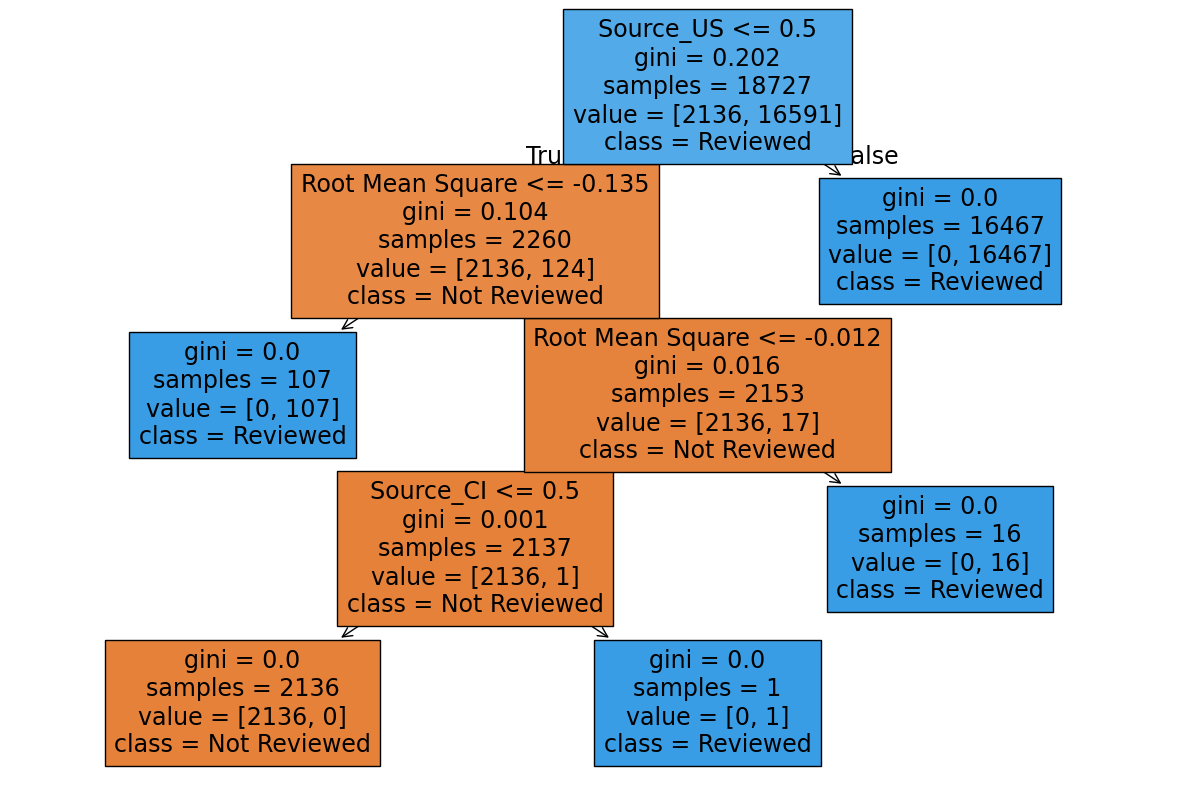

In [ ]:
## Visualation
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Reviewed', 'Reviewed'])
plt.show()

In [ ]:
## Save the model
import joblib
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

['decision_tree_model.pkl']